# Waterfall vs. Airsip: Who is correct?

## A project executed by Keva Singhal, Niveditha Janakiraman, and Tejaswi Bokkisam

### **Introduction**

One fateful evening on a Thursday night as I (Keva) was studying for a MATH410 quiz with my friend Frances, Frances interuppted my studying to ask me one question: *What word do you use when someone drinks water without touching their mouth to the bottle?*

My immediate response was Waterfall, unbeknownst of the entire debate that had spiraled in the CSA (Chinese Student Association) discord server.Unbeknownst, riots were being staged, murders were being planned and many people started creating a hit list. Why? It seems that a majority of the people from Maryland seem to call this action Airsip rather than Waterfall. In disbelief and shock, I put my MATH410 studying aside and chose to focus on this debate between Waterfall and Airsip. What made matters worse was when someone from New Jersey, just like me, said they called this action Airsip. This man then proceeds to call me a hillbilly and redneck (for kicks and giggles) since I live in South Jersey. 

Following these personal attacks, I messaged my friends back at home in NJ and my brother about this debate, and the response I got were surprising to say the least. Apparently, my brother has been calling this action "Fountain" along with some of my other friends. Otherwise, the majority of the response I got from my friends said they called it "Waterfall". This discussion flooded beyond further to my roommates, my collegues and even my teachers. 

This debate sparked a idea and we became curious about whether or not there are different words said in other states. I was reminded of a dialect quiz I took in Linguistics 200, where certain words and phrases can indicate what part of the US your dialect is from. In this, the creation of a chloropleth map could help us create an Isogloss.

**Definition according to Wikipedia**

Isogloss: Geographic boundary of a certain linguistic feature, such as a pronunciation of a vowel, the meaning of a word, or the use of some morphological or syntactic feature.

If we can create a map that showcases any data about this topic, we could possibly create a new isogloss for the Airsip vs Waterfall debate. The purpose of this project will be to analyze this debate on airsip vs waterfall, while trying to find any possible differences that could possibly occur due to Sex, Age and Height.

### **Data Collecting and Scraping**

Before we get to the actual data set, we would like to first show you the process of scraping poll data from social media. When we first started researhcing this project, we came across a number of different polls on Twitter and Reddit that have hundrends of responses to this debate. We will be taking that data into account as a means to start of our project. Let's start by scraping Reddit poll data from this UMBC poll!

First, install **praw** by running **pip install praw** in your terminal.

Import the following statements. We will be using some of them later on for the rest of the project. 

In [101]:
import pandas as pd
import numpy as np
import folium
import requests
import re
import matplotlib.pyplot as plt
import seaborn as sns
import praw
from datetime import datetime
from bs4 import BeautifulSoup

Next, we will need access to the Reddit API to be able to make use of the Reddit data. Create a user API token here https://www.reddit.com/prefs/apps using your reddit account. 

Once you login, click create app and fill in the following fields:
1. Name -> This can be named anything you like
2. Click script
3. Add a small description so Reddit doesn't think you are a bot
4. Make sure the redirect URI is http://localhost:8080/

Click create app. This should take you to a page that will have your client_id, secret and user_agent (name). Copy and paste these into the command below so that you can access Reddit. 

In [5]:
reddit = praw.Reddit(client_id='l9Kr08R2JGKyN8LC_dKTOA', client_secret='0_qcB7u1G2zH3MupclxPfpTLrz3Rfg', user_agent='CMSC320')

Let's take a look at a reddit post on the UMBC subreddit. I just want to show you guys the comments on this post. They are hilarious lol.

But more importantly, this is how we access a single thread on Reddit. We must provide a URL of the thread in the submission() function, which will return an instance of Submission that has all the data on the page packed into an object. Very useful later on!

In [6]:
UMBC = reddit.submission(url='https://www.reddit.com/r/UMBC/comments/l8b6mo/waterfall_or_air_sip/')

for top_level_comment in UMBC.comments:
    print(top_level_comment.body)

if you vote "air sip" your enrollment has now been rescinded
Those who said air sip, what the hell is wrong with you?
I think Air Sip is a Montgomery County thing. 

Waterfall is everywhere else.
you aren't sipping the air. you aren't sipping at all.
In Nigeria we actually call this 'skying'
if you ask me, I wouldn’t call it social distancing
OP, here's a poll too. 

https://www.strawpoll.me/12935217/r
Waterfall for life
Neither...


Highkey, I agree with the first two statements :) that's just me though.

But as you can see, if this submission did not have a poll, we could just as easily scrape through the comments and note down any instances of waterfall and airsip as our data. However, this would be tedious and annoying so we will just be looking at the poll. 

To access the poll, you can use the .poll_data function as follows.

In [7]:
poll_data = UMBC.poll_data
print(f"There are {poll_data.total_vote_count} votes total.")
print("The options are:")

for option in poll_data.options:
    print(f"{option} ({option.vote_count} votes)")

There are 323 votes total.
The options are:
Air sip (86 votes)
Waterfall (237 votes)


This gives us an idea of what data is presented in these polls. If you can sucessfuly print what we have above, then we can just as easily create a dataframe for this!

Let's parse this data into string and int data, and then put this into a dataframe. For each of the options, we will add the option to a name indicator list and we will add the number of votes to the number of votes list. Then, we will label each of these with column name and finally create the dataframe instance. Now we have easy access to our data!

In [8]:
name = ['Total']
num = [int(poll_data.total_vote_count)]

for option in poll_data.options:
    name.append(str(option))
    num.append(int(option.vote_count))

oop = { 'Word': name,
        'Votes': num }

umbcdf = pd.DataFrame(oop)
umbcdf

,Word,Votes
0,Total,323
1,Air sip,86
2,Waterfall,237


I am going to repeat the following with one more reddit post as shown below. 

In [9]:
northeastern = reddit.submission(url='https://www.reddit.com/r/NEU/comments/hpehhd/whats_the_correct_word/')

for top_level_comment in northeastern.comments:
    print(top_level_comment.body)

Fuck is a birdie that's golf???
Air sip is the noun, waterfall is the verb
It's a sky bro.
dolla
“Can I sky that”
neither it's sky
ITS AIRSIP
Its hockey sip
people from Boston say sky and I know we're in Boston or whatever but that's just wrong
Oh nah y’all saying waterfall??? How do I transfer schools


Where the hell did sky and birdie come from :,(

Truly horrifying

In [10]:
poll_data = northeastern.poll_data

name = ['Total']
num = [int(poll_data.total_vote_count)]

for option in poll_data.options:
    name.append(str(option))
    num.append(int(option.vote_count))

oop = { 'Word': name,
        'Votes': num }

nedf = pd.DataFrame(oop)
nedf

,Word,Votes
0,Total,478
1,Air sip,120
2,Birdie,25
3,Waterfall,333


Unfortunately, we could not find a comprehensive dataset that encompasses this entire discussion on a country-wide scale. Also, simply using reddit data to understand this debate would also not be valid. Therefore, we made the decision to conduct our own survey and try to get as many responses as possible to be able to continue with our investigation. 

In [11]:
# Read in the Waterfall vs. Airsip CSV file
data = pd.read_csv("WaterfallvsAirsip.csv")
data

,Timestamp,Birthday (MM/DD/YYYY)\n\ni.e. 01/14/2001,Height (Answer in Inches Please)\n\ni.e. 60 inches = 5'0,Sex,Coffee or Tea?,Early Bird or Night Owl,"What is your current state of residence? Please answer in abbreviations.\n\ni.e. NJ, MD, PA, NY, CA, etc.",How long have you stayed in this state? Answer in years and can be in decimals!,Which county are you from? COUNTY not country,"What state have you lived in the longest? Write down that state(s) in abbreviation. Otherwise, write N/A","If so, how long? Write N/A if you answered ""N/A""",What do you call the action shown in the picture above?
0,11/22/2022 3:24:50,08/19/2002,61.0,Female,Tea,Night Owl,NJ,20.00,Camden,NaN,NaN,Waterfall
1,11/22/2022 3:33:28,01/10/2002,64.8,Female,Tea,Night Owl,MD,16.00,Howard,OH,4,Waterfall
2,11/22/2022 5:38:43,10/26/2002,60.0,Female,Tea,Early Bird,IN,0.17,United States,IL,19,Waterfall
3,11/22/2022 6:35:28,10/28/2000,73.0,Male,Neither,Night Owl,MD,22.00,St mary’s county,NaN,NaN,Waterfall
4,11/22/2022 7:52:55,10/23/2002,62.0,Nonbinary,Coffee,Night Owl,MD,12.50,Harford,CA,8,Waterfall
...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,12/5/1999,60.0,Female,Tea,Night Owl,NJ,2.00,NaN,WI,10,Waterfall
996,NaN,9/1/2004,63.0,Female,Tea,Night Owl,KS,5.00,NaN,CA,5,Birdie
997,NaN,7/26/1991,60.0,Female,Tea,Early Bird,WA,6.00,NaN,UT,25,Waterfall
998,NaN,9/7/1988,71.0,Male,Tea,Night Owl,TX,19.00,NaN,TX,19,Waterfall


In [12]:
# CLEANING UP THE DATA

In [13]:
# Remove the timestamp column (We will not be needing this for data analysis)
data.drop(data.columns[[0]], axis=1, inplace=True)

In [14]:
# Change column headers into more simpler terms
data.columns = ['Birthday', 'Height(in)', 'Sex', 'Coffee/Tea', 'Early Bird/Night Owl', 'Current State of Residence', 
                'Years in Current State', 'County', 'State of Longest Residence', 'Years in Longest State', 'Action']

# Change the "Birthday" column to be datetime objects
data.Birthday = pd.to_datetime(data.Birthday)
data

,Birthday,Height(in),Sex,Coffee/Tea,Early Bird/Night Owl,Current State of Residence,Years in Current State,County,State of Longest Residence,Years in Longest State,Action
0,2002-08-19,61.0,Female,Tea,Night Owl,NJ,20.00,Camden,NaN,NaN,Waterfall
1,2002-01-10,64.8,Female,Tea,Night Owl,MD,16.00,Howard,OH,4,Waterfall
2,2002-10-26,60.0,Female,Tea,Early Bird,IN,0.17,United States,IL,19,Waterfall
3,2000-10-28,73.0,Male,Neither,Night Owl,MD,22.00,St mary’s county,NaN,NaN,Waterfall
4,2002-10-23,62.0,Nonbinary,Coffee,Night Owl,MD,12.50,Harford,CA,8,Waterfall
...,...,...,...,...,...,...,...,...,...,...,...
995,1999-12-05,60.0,Female,Tea,Night Owl,NJ,2.00,NaN,WI,10,Waterfall
996,2004-09-01,63.0,Female,Tea,Night Owl,KS,5.00,NaN,CA,5,Birdie
997,1991-07-26,60.0,Female,Tea,Early Bird,WA,6.00,NaN,UT,25,Waterfall
998,1988-09-07,71.0,Male,Tea,Night Owl,TX,19.00,NaN,TX,19,Waterfall


In [15]:
# We will first replace any mispelled NaN values with real NaN values.
data = data.replace('N/a', np.nan).replace('n/a', np.nan).replace('no', np.nan).replace('No', np.nan).replace('na', np.nan).replace('Na', np.nan)

# Someone said they lived in a state for a school year. So we will approximate to 1 year.
data = data.replace('School year', 1)

# For any NaN values in the "State of Longest Residence" column we will replace it with their corresponding values in the "Current State of Residence" column.
# We will also replace NaN values in the "Years in Longest State" column with their corresponding values in the "Years in Currest State" column. 
# This is because the surveyee has not lived in another state other than their current state, which means that the current state they are living in is the state they have lived in the longest. 
data["State of Longest Residence"] = np.where(data["Years in Longest State"].isnull(), data["Current State of Residence"], data["State of Longest Residence"])
data["Years in Longest State"] = np.where(data["Years in Longest State"].isnull(), data["Years in Current State"], data["Years in Longest State"])
data

,Birthday,Height(in),Sex,Coffee/Tea,Early Bird/Night Owl,Current State of Residence,Years in Current State,County,State of Longest Residence,Years in Longest State,Action
0,2002-08-19,61.0,Female,Tea,Night Owl,NJ,20.00,Camden,NJ,20.0,Waterfall
1,2002-01-10,64.8,Female,Tea,Night Owl,MD,16.00,Howard,OH,4,Waterfall
2,2002-10-26,60.0,Female,Tea,Early Bird,IN,0.17,United States,IL,19,Waterfall
3,2000-10-28,73.0,Male,Neither,Night Owl,MD,22.00,St mary’s county,MD,22.0,Waterfall
4,2002-10-23,62.0,Nonbinary,Coffee,Night Owl,MD,12.50,Harford,CA,8,Waterfall
...,...,...,...,...,...,...,...,...,...,...,...
995,1999-12-05,60.0,Female,Tea,Night Owl,NJ,2.00,NaN,WI,10,Waterfall
996,2004-09-01,63.0,Female,Tea,Night Owl,KS,5.00,NaN,CA,5,Birdie
997,1991-07-26,60.0,Female,Tea,Early Bird,WA,6.00,NaN,UT,25,Waterfall
998,1988-09-07,71.0,Male,Tea,Night Owl,TX,19.00,NaN,TX,19,Waterfall


In [16]:
# Below, we have the same person who submitted twice. They realized they made a mistake a requested to delete their previous response.
print(data.iloc[85])
print()
print(data.iloc[86])

Birthday                      2003-08-20 00:00:00
Height(in)                                   60.0
Sex                                        Female
Coffee/Tea                                    Tea
Early Bird/Night Owl                   Early Bird
Current State of Residence                     CA
Years in Current State                       19.0
County                                        USA
State of Longest Residence                     CA
Years in Longest State                       19.0
Action                                  Waterfall
Name: 85, dtype: object

Birthday                                            2003-08-20 00:00:00
Height(in)                                                         60.0
Sex                                                              Female
Coffee/Tea                                                          Tea
Early Bird/Night Owl                                         Early Bird
Current State of Residence                                       

In [17]:
# Let's modify her first response (row 85) and delete her second response
data.iat[85,7] = 'Alameda'
data.iat[85,8] = 'CA'
data.iat[85,9] = 19.0

# Lets check our work
print(data.iloc[85])

# Drop the extra row
data.drop(86,axis=0,inplace=True)

# We can see that row 86 has been dropped and 85 has been modified correctly
data[83:87]

Birthday                      2003-08-20 00:00:00
Height(in)                                   60.0
Sex                                        Female
Coffee/Tea                                    Tea
Early Bird/Night Owl                   Early Bird
Current State of Residence                     CA
Years in Current State                       19.0
County                                    Alameda
State of Longest Residence                     CA
Years in Longest State                       19.0
Action                                  Waterfall
Name: 85, dtype: object


,Birthday,Height(in),Sex,Coffee/Tea,Early Bird/Night Owl,Current State of Residence,Years in Current State,County,State of Longest Residence,Years in Longest State,Action
83,2001-10-01,69.0,Male,Tea,Early Bird,IL,1.5,Taiwan 🇹🇼,IL,1.5,No term for this
84,2000-02-05,59.0,Female,Neither,Early Bird,MD,22.0,Montgomery,MD,22.0,Airsip
85,2003-08-20,60.0,Female,Tea,Early Bird,CA,19.0,Alameda,CA,19.0,Waterfall
87,2003-04-06,60.0,Female,Tea,Night Owl,CA,19.0,Alameda County,CA,19.0,Waterfall


In [18]:
# Some other rows we can drop are responses from surveyees who do not answer the questions appropriately
# We will remove these three since they do not give much relevant information. (No states were mentioned, height of the person is impossible, etc.)

print(data.loc[19])
print()
print(data.loc[33])
print()
print(data.loc[183])

Birthday                      1999-11-11 00:00:00
Height(in)                                    1.0
Sex                                        Female
Coffee/Tea                                    Tea
Early Bird/Night Owl                   Early Bird
Current State of Residence                     RM
Years in Current State                        7.0
County                                        BTS
State of Longest Residence          Seokjin oppar
Years in Longest State                          7
Action                          Holy juice drip 🤤
Name: 19, dtype: object

Birthday                      2001-01-07 00:00:00
Height(in)                                   70.0
Sex                                          Male
Coffee/Tea                                    Tea
Early Bird/Night Owl                    Night Owl
Current State of Residence                     MD
Years in Current State                       17.5
County                                       Here
State of Longest Residenc

In [19]:
# Drop the first one
data.drop(19,axis=0,inplace=True)
data[17:22]

,Birthday,Height(in),Sex,Coffee/Tea,Early Bird/Night Owl,Current State of Residence,Years in Current State,County,State of Longest Residence,Years in Longest State,Action
17,2002-11-08,69.0,Female,Tea,Night Owl,MD,19.0,Montgomery,TX,1,Airsip
18,2002-01-15,71.0,Male,Coffee,Night Owl,MD,20.9,United States,MD,20.9,Airsip
20,2002-02-13,67.0,Female,Tea,Night Owl,MD,19.2,USA,MD,19.2,Airsip
21,2002-04-01,66.0,Female,Coffee,Night Owl,MD,20.0,United States of America,MD,20.0,Airsip
22,2002-08-21,67.0,Female,Tea,Night Owl,MD,18.0,Montgomery County,VA,2 years,Airsip


In [20]:
# Drop the second one
data.drop(33,axis=0,inplace=True)
data[30:36]

,Birthday,Height(in),Sex,Coffee/Tea,Early Bird/Night Owl,Current State of Residence,Years in Current State,County,State of Longest Residence,Years in Longest State,Action
31,2002-08-02,70.0,Male,Coffee,Night Owl,NJ,4.0,Middlesex,"New York, Massachussets, California","3, 7, 3, 4",Waterfall
32,2001-03-12,64.0,Female,Neither,Early Bird,MD,20.0,Wicomico,MD,20.0,Waterfall
34,2001-04-02,61.0,Female,Tea,Night Owl,MD,21.0,Prince George's County,MD,21.0,Waterfall
35,1985-01-15,69.0,Male,Coffee,Night Owl,NJ,29.0,Morris,"MD,PA,NY,VT","8,2.5,4,1",Waterfall
36,2003-12-29,68.0,Male,Neither,Night Owl,MD,18.8,US,MD,18.8,Airsip
37,2001-04-27,62.0,Female,Coffee,Night Owl,MD,18.0,Wicomico,MD,18.0,Waterfall


In [21]:
# Drop the third one
data.drop(183,axis=0,inplace=True)
data[176:183]

,Birthday,Height(in),Sex,Coffee/Tea,Early Bird/Night Owl,Current State of Residence,Years in Current State,County,State of Longest Residence,Years in Longest State,Action
179,2002-05-06,62.00,Female,Tea,Night Owl,MD,1.5,India,PA,16,Waterfall
180,2004-10-01,62.00,Female,Coffee,Night Owl,NJ,14.0,USA,"KY, NC","2,2",Waterfall
181,2006-04-05,69.00,Female,Coffee,Night Owl,NJ,11.0,"Wake county, NC","NC, Perth (australia)","NC (1), Perth (4)",Waterfall
182,2000-12-26,68.75,Female,Tea,Night Owl,MD,22.0,Baltimore County,MD,22.0,Waterfall
184,1969-06-05,71.50,Male,Coffee,Early Bird,ID,20.5,Ada,"TX, CA, WI, MS, AZ","3, 25.5, 2, .75, 1",No term for this
185,1974-10-29,65.00,Male,Coffee,Early Bird,IA,40.0,USA,IA,40.0,Pourgnorgin
186,1996-08-21,72.00,Male,Coffee,Night Owl,MT,7.2,Missoula,NJ,18,Waterfall


In [22]:
# We had originally asked the surveyees to provide all of the other states they have lived in, and how many years they lived in each state.
# This is why at first, the some of the states and years in "State of Longest Residence" (Column 9) and "Years in Longest State" (Column 10) are separated by commas, where each year corresponds to a state.
# For example, Column 9: MD, UT, AR | Column 10: 3, 1, 2 --> this means that they lived in MD for 3 years, UT for 1 year and AR for 2 years.
# Lets narrow these values down to just the state they lived in the longest and its corresponding year.

In [76]:
# We will first clean up the states in the "State of Longest Residence" and "Years in Longest State" column
# We want all states to be abbreviated and uppercase (i.e. MD)

# First, make a list of all states abbreviated in uppercase
states = [ 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
           'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
           'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
           'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
           'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']

# Next, make a list of the full names of all states in uppercase in the same order as the abbreviations in the 'states' list above.
states_full = [ 'ALASKA', 'ALABAMA', 'ARKANSAS', 'ARIZONA', 'CALIFORNIA', 'COLORADO', 'CONNECTICUT', 'DISTRICT OF COLUMBIA', 
               'DELAWARE', 'FLORIDA', 'GEORGIA', 'HAWAII', 'IOWA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'KANSAS', 'KENTUCKY', 
               'LOUISIANA', 'MASSACHUSSETS', 'MARYLAND', 'MAINE', 'MICHIGAN', 'MINNESOTA', 'MISSOURI', 'MISSISSIPPI', 
               'MONTANA', 'NORTH CAROLINA', 'NORTH DAKOTA', 'NEBRASKA', 'NEW HAMPSHIRE', 'NEW JERSEY', 'NEW MEXICO', 'NEVADA', 
               'NEW YORK', 'OHIO', 'OKLAHOMA', 'OREGON', 'PENNSYLVANIA', 'RHODE ISLAND', 'SOUTH CAROLINA', 'SOUTH DAKOTA', 
               'TENNESSEE', 'TEXAS', 'UTAH', 'VIRGINIA', 'VERMONT', 'WASHINGTON', 'WISCONSIN', 'WEST VIRGINIA', 'WYOMING']
# Note: MASSACHUSETTS is intentionally misspelled as MASSACHUSSETS because one surveyee mispelled it. 
# In order to identify it in our loop we intentionally misspell it.

# Now we will begin with the cleaning process by iterating through all rows in the dataset
for idx, row in data.iterrows():
    
    # Here we get rid of the commas separating the state and year values in the current row
    txt = str(row["State of Longest Residence"]).split(',')
    years = str(row["Years in Longest State"]).split(',')
    
    # We will add cleaned states and years in the lists below:
    # List of state abbreviations for every response in "State of Longest Residence" in the current row
    sts = []
    # List of years for every response in "Years in Longest State" in the current row
    yrs = []
    
    # Iterating through each value(state/location) in txt
    for x in txt:
        
        # The index of x in txt will be used to locate its corresponding value in the list of years
        i = txt.index(x)
        
        # Here we account for any responses with the full state name instead of the abbreviation
        # We also get rid of any leading and trailing whitespace using strip()
        if x.strip().upper() in states_full:
            
            # We look at where x is in the states_full list and use that index to append its corresponding state in abbreviations to the 'sts' list
            sts.append(states[states_full.index(x.strip().upper())])
            
            # With this regex, we only extract the numbers from the provided years. 
            # This is because some responses included the word "year" or "month" instead of just a number
            yr = re.findall("(?:\d+(?:\.\d*)?|\.\d+)", years[i].strip())[0]
            
            # Some responses include the number of months, so we convert those into years
            if "month" in years[i]:
                yr = float(yr)/12.0
            
            
            yrs.append(yr)
            
        # Here we check if it is a state abbreviation
        elif x.strip().upper() in states:
            sts.append(x.strip().upper())
            
            yr = re.findall("(?:\d+(?:\.\d*)?|\.\d+)", years[i].strip())[0]
            
            if "month" in years[i]:
                yr = float(yr)/12.0
                
            yrs.append(yr)
        # If it is not a state at all then do nothing 
        # This ensures that anything that is not a state does not get added to a list
        else:
            continue
    
    # Modify each cell into the cleaner lists of states and years
    data.at[idx, "State of Longest Residence"] = sts
    data.at[idx, "Years in Longest State"] = yrs
    
data.head(38)

,Birthday,Height(in),Sex,Coffee/Tea,Early Bird/Night Owl,Current State of Residence,Years in Current State,County,State of Longest Residence,Years in Longest State,Action
0,2002-08-19,61.0,Female,Tea,Night Owl,NJ,20.00,Camden,[],[],Waterfall
1,2002-01-10,64.8,Female,Tea,Night Owl,MD,16.00,Howard,[],[],Waterfall
2,2002-10-26,60.0,Female,Tea,Early Bird,IN,0.17,United States,[],[],Waterfall
3,2000-10-28,73.0,Male,Neither,Night Owl,MD,22.00,St mary’s county,[],[],Waterfall
4,2002-10-23,62.0,Nonbinary,Coffee,Night Owl,MD,12.50,Harford,[],[],Waterfall
5,2002-05-20,60.0,Female,Tea,Early Bird,MD,20.50,St. Mary’s County,[],[],Waterfall
6,2002-05-03,66.0,Female,Tea,Night Owl,MD,20.50,United States,[],[],Waterfall
7,2001-09-04,76.0,Male,Tea,Night Owl,MD,21.00,USA,[],[],Waterfall
8,2004-08-03,65.0,Female,Neither,Night Owl,MD,5.00,Howard,[],[],Waterfall
9,2002-04-18,62.0,Female,Tea,Night Owl,MD,7.40,United States,[],[],Waterfall


In [24]:
# Now that we have cleaned up those two columns, we can go through each row to see which state was lived in the longest for each response
for idx, row in data.iterrows():
    # Convert each list of years to floats so we can compare
    lst = [float(x) for x in row["Years in Longest State"]]
    
    # If the list of years is empty, set both the year and state values to NaN
    if len(lst)==0:
        data.at[idx, "Years in Longest State"] = np.nan
        data.at[idx, "State of Longest Residence"] = np.nan
    
    # If there is only one year in the list then the corresponding state is automatically the state most lived in
    elif len(lst)==1:
        data.at[idx, "Years in Longest State"] = lst[0]
        data.at[idx, "State of Longest Residence"] = row["State of Longest Residence"][0]
        
    # If there is more than one year in the list then we compare them and choose the max year
    # This max year will replace the current list in "Years in Longest State" and its corresponding state will replace the current list in "State of Longest Residence"
    else:
        max_yr = max(lst)
        data.at[idx, "Years in Longest State"] = max_yr
        i = lst.index(max_yr)
        data.at[idx, "State of Longest Residence"] = row["State of Longest Residence"][i]

In [25]:
# We update any NaN values as we did previously. Where the current state and year replace the longest state and year that are NaN.
data["State of Longest Residence"] = np.where(data["Years in Longest State"].isnull(), data["Current State of Residence"], data["State of Longest Residence"])
data["Years in Longest State"] = np.where(data["Years in Longest State"].isnull(), data["Years in Current State"], data["Years in Longest State"])
data.head(38)

,Birthday,Height(in),Sex,Coffee/Tea,Early Bird/Night Owl,Current State of Residence,Years in Current State,County,State of Longest Residence,Years in Longest State,Action
0,2002-08-19,61.0,Female,Tea,Night Owl,NJ,20.00,Camden,NJ,20.0,Waterfall
1,2002-01-10,64.8,Female,Tea,Night Owl,MD,16.00,Howard,OH,4.0,Waterfall
2,2002-10-26,60.0,Female,Tea,Early Bird,IN,0.17,United States,IL,19.0,Waterfall
3,2000-10-28,73.0,Male,Neither,Night Owl,MD,22.00,St mary’s county,MD,22.0,Waterfall
4,2002-10-23,62.0,Nonbinary,Coffee,Night Owl,MD,12.50,Harford,CA,8.0,Waterfall
5,2002-05-20,60.0,Female,Tea,Early Bird,MD,20.50,St. Mary’s County,MD,20.5,Waterfall
6,2002-05-03,66.0,Female,Tea,Night Owl,MD,20.50,United States,MD,20.5,Waterfall
7,2001-09-04,76.0,Male,Tea,Night Owl,MD,21.00,USA,MD,21.0,Waterfall
8,2004-08-03,65.0,Female,Neither,Night Owl,MD,5.00,Howard,TX,5.0,Waterfall
9,2002-04-18,62.0,Female,Tea,Night Owl,MD,7.40,United States,KY,6.0,Waterfall


In [26]:
# Lets take a look at the unique values in the "Current State of Residence" column.
print(pd.unique(data["Current State of Residence"]))

['NJ' 'MD' 'IN' 'PA' 'TX' 'VA' 'IL' 'Tx' 'WA' 'KS' 'CA' 'NV' 'ca' 'NE'
 'Nv' 'NH' 'NC' 'MA' 'Md' 'ID' 'IA' 'MT' 'Id' 'OK' 'Ak' 'UT' 'AK' 'WY'
 'AZ' 'ME' 'DC' 'WI' 'OH' 'WV' 'MI' 'TN' 'FL' 'AL' 'NM' 'GA' 'DE' 'NY'
 'MO' 'VT' 'MS' 'SC' 'HI' 'ND' 'OR' 'KY' 'RI' 'SD' 'CT' 'AR' 'CO' 'LA'
 'MN']


In [27]:
# Since the state abbreviations are not all capitalized, we will capitalize them.
data["Current State of Residence"] = data["Current State of Residence"].apply(lambda x: x.upper())
# Now they are all upper case.
print(pd.unique(data["Current State of Residence"]))

['NJ' 'MD' 'IN' 'PA' 'TX' 'VA' 'IL' 'WA' 'KS' 'CA' 'NV' 'NE' 'NH' 'NC'
 'MA' 'ID' 'IA' 'MT' 'OK' 'AK' 'UT' 'WY' 'AZ' 'ME' 'DC' 'WI' 'OH' 'WV'
 'MI' 'TN' 'FL' 'AL' 'NM' 'GA' 'DE' 'NY' 'MO' 'VT' 'MS' 'SC' 'HI' 'ND'
 'OR' 'KY' 'RI' 'SD' 'CT' 'AR' 'CO' 'LA' 'MN']


In [28]:
# Lets look at the unique values in the "Actions" column
print(pd.unique(data["Action"]))

['Waterfall' 'Airsip' 'gluck gluck 3000' 'No term for this' 'Birdie'
 'Birdie Sip' 'Sky "Let me sky that"' 'Fountain' 'Airdrink 🙃'
 'I use waterfall and airship interchangeably' 'Pourgnorgin' 'Chug' 'Sky'
 'Pop' 'Airdrink']


In [29]:
# It seems that we can simplify some of these. We make it so that:
# "Birdie Sip" = "Birdie"
# "Sky "Let me sky that"" = "Sky"
# "Airdrink 🙃" = "Airdrink"
# "I use waterfall and airship interchangeably" = "Airsip"

print(data.at[115,"Action"])
data.at[115,"Action"] = 'Birdie'

print(data.at[127,"Action"])
data.at[127,"Action"] = 'Sky'

print(data.at[152,"Action"])
data.at[152,"Action"] = 'Airdrink'

print(data.at[178,"Action"])
data.at[178,"Action"] = 'Airsip'

Birdie Sip
Sky "Let me sky that"
Airdrink 🙃
I use waterfall and airship interchangeably


In [30]:
# import plotly.express as px
# import folium
# data

num_in_states = data.groupby(['Current State of Residence', 'Action']).size().reset_index()
num_in_states

# m = folium.Map(location=[48, -102], zoom_start=3)
# folium.Choropleth(
#     geo_data=states,
#     data=num_in_states,
#     columns=['Current State of Residence', 'Action'],
#     key_on="feature.properties.Action",
#     legend_name='Action',
#     bins=data['Action'].unique()
# ).add_to(m)

# m

,Current State of Residence,Action,0
0,AK,Airdrink,1
1,AK,Fountain,1
2,AK,Waterfall,20
3,AL,Airsip,1
4,AL,Pop,1
...,...,...,...
134,WV,Sky,1
135,WV,Waterfall,14
136,WY,Airsip,1
137,WY,No term for this,1


In [31]:
## Comparing Action vs. Sex

gen_act = data.groupby(['Sex', 'Action']).size().reset_index(name='Counts')
gen_act
## Looking at this we can see the counts of how many people in each sex define this action

,Sex,Action,Counts
0,Female,Airdrink,9
1,Female,Airsip,60
2,Female,Birdie,12
3,Female,Fountain,7
4,Female,No term for this,18
5,Female,Pop,3
6,Female,Sky,9
7,Female,Waterfall,407
8,Male,Airdrink,9
9,Male,Airsip,39


Text(0, 0.5, 'Number of Females')

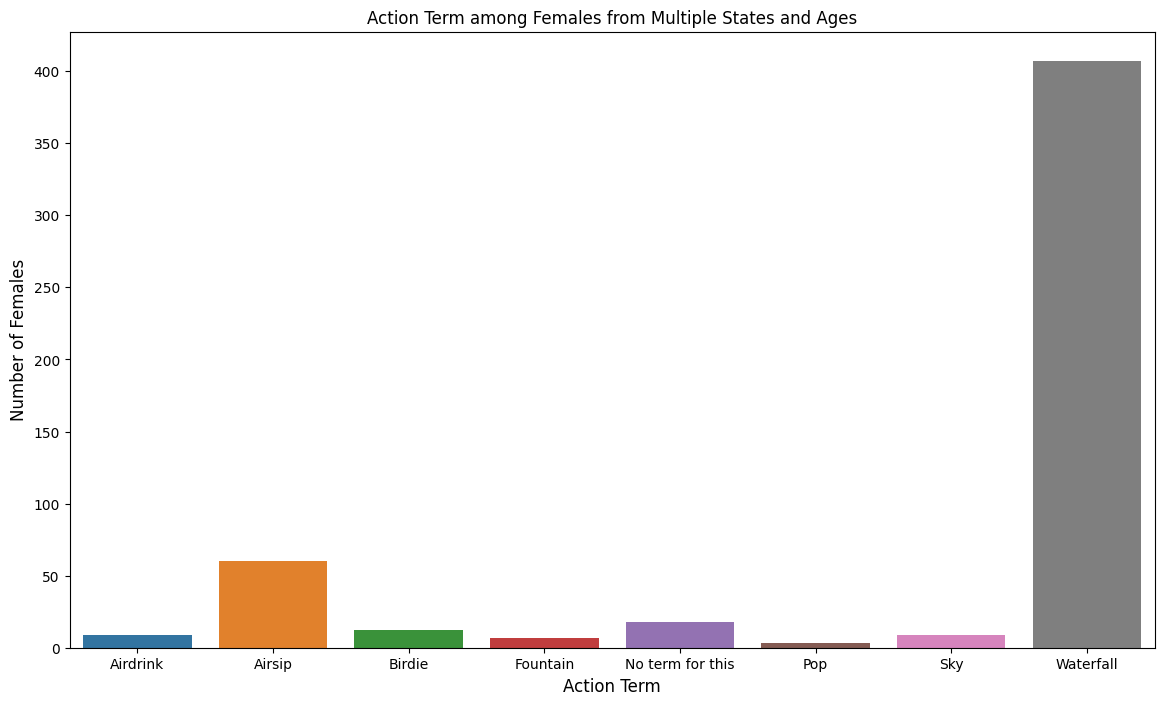

In [32]:
## Plotting the number of FEMALES that say each term into a Barplot
plt.figure(figsize=(14,8))
sns.barplot(data=gen_act[gen_act['Sex'] == "Female"], x="Action", y="Counts")
plt.title("Action Term among Females from Multiple States and Ages", fontsize = 12)
plt.xlabel("Action Term", fontsize = 12)
plt.ylabel("Number of Females", fontsize = 12)

Text(0, 0.5, 'Number of Males')

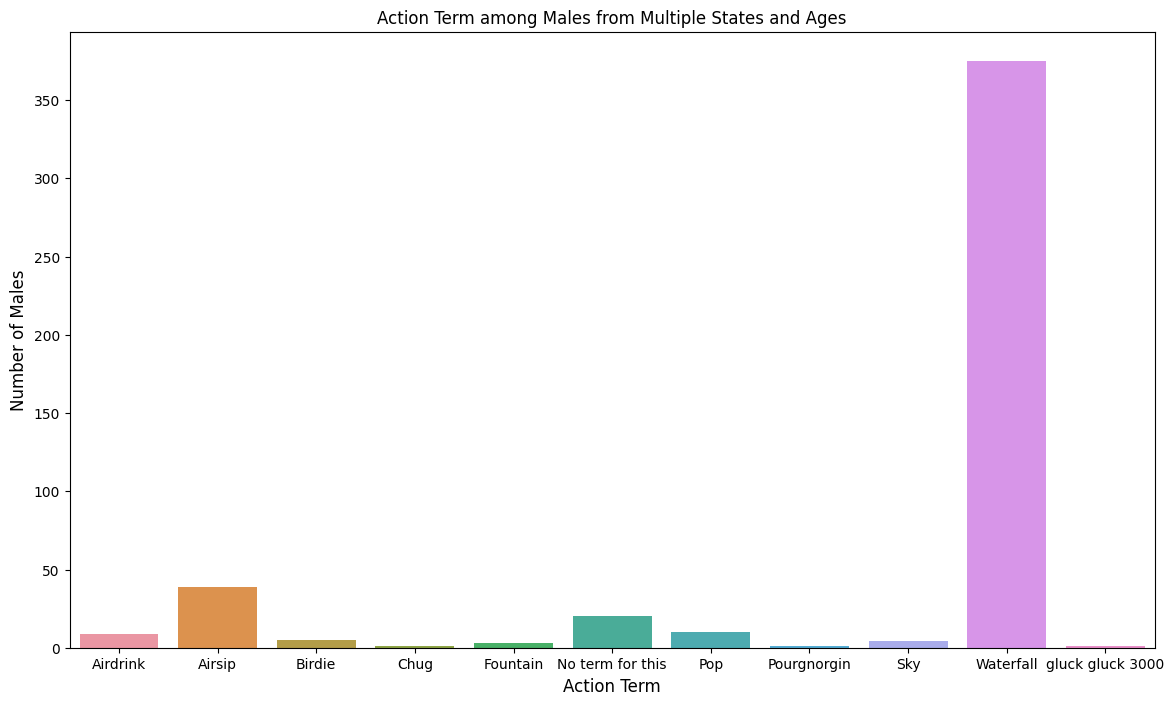

In [33]:
## Plotting the number of MALES that say each term into a Barplot
plt.figure(figsize=(14,8))
sns.barplot(data=gen_act[gen_act['Sex'] == "Male"], x="Action", y="Counts")
plt.title("Action Term among Males from Multiple States and Ages", fontsize = 12)
plt.xlabel("Action Term", fontsize = 12)
plt.ylabel("Number of Males", fontsize = 12)

In [34]:
## Analyzing the number of OTHER GENDERS that say each term into a Barplot
# Plotting it will not give us a lot of information because both people with Sex = Nonbinary use Waterfall.
# The other Sex = "yes please" which is not a valid option that we will be considering for this.

temp = gen_act[gen_act['Sex'] != "Male"]
temp = temp[temp['Sex'] != "Female"]
temp

,Sex,Action,Counts
19,Nonbinary,Waterfall,1
20,non-binary,Waterfall,1
21,yes please,Airsip,1


In [35]:
# Will add more graphs in the morning

Now we will take a look at making a choropleth map to map out a good idea of the frequency for each of these action terms. We will be using a module called plotly.express that will allow us to create choropleth maps.

First, import the module as shown below

In [66]:
import plotly.express as px

For the purposes of showing the process, I will show how to do this for one of the possible actions. Let's filter our dataset num_in_states to just have the values for "Airdrink". For readability, I changed the columns names. Finally, we need to get the sum of the data frequnecies overall for that action value. Use the .sum function on the dataframe column to do so.

In [86]:
airdrink = num_in_states[num_in_states["Action"] == "Airdrink"]
airdrink.columns = ['Residence', 'Action', 'Count']
summ = airdrink['Count'].sum()
airdrink

,Residence,Action,Count
0,AK,Airdrink,1
9,CA,Airdrink,1
13,CO,Airdrink,1
15,CT,Airdrink,1
52,MD,Airdrink,1
72,MS,Airdrink,1
86,NJ,Airdrink,3
92,NV,Airdrink,1
102,OK,Airdrink,1
105,OR,Airdrink,1


Now, we will create a choropleth map. Use the choropleth and edit the following fields

1. dataframe we created above
2. locations -> the "Residence" column or whatever column you used to store your abbreviated state names
3. locationmode -> "USA-states" since this mode takes in abbreviated USA state names
4. scope -> "usa" since our data is just constricted to the US. This will make the choropleth map focus specifically on the US
5. color -> the "Count" column or whatever column you used to store your frequency variable
6. color_continuous_scale -> For formatting purposes, can be any color design of your choice

Change the layout of the figure to make it readable and then show the figure. Make sure to label your figure with a unique title!

In [93]:
fig = px.choropleth(airdrink, locations="Residence", 
                    locationmode="USA-states", 
                    scope="usa", 
                    color="Count", 
                    range_color=(0,80),
                    color_continuous_scale="agsunset_r")

fig.update_layout(
      title_text = 'Frequency of Airdrink Users in the United States',
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
)
fig.show()

Let's repeat the following for all the different possible options! Using Loop to go through all possible values with the same code from above

In [95]:
groupbyaction = data.groupby(['Action']).size().reset_index()
actiondata = np.array(groupbyaction["Action"])
names = np.unique(actiondata)

for name in names:

    if (name == "Chug") :
        continue
    elif(name == "Pourgnorgin") :
        continue
    elif(name == "gluck gluck 3000"):
        continue
    elif(name == "Airdrink"):
        continue
    
    filterbyname = num_in_states[num_in_states["Action"] == name]
    filterbyname.columns = ['Residence', 'Action', 'Count']
    summ = filterbyname['Count'].sum()

    fig = px.choropleth(filterbyname, locations="Residence", 
                    locationmode="USA-states", 
                    scope="usa",
                    range_color=(0,70),
                    color="Count", 
                    color_continuous_scale="agsunset_r")

    fig.update_layout(
            title_text = f'Frequency of {name} Users in the United States',
            title_font_size = 22,
            title_font_color="black", 
            title_x=0.45, 
    )
    fig.show()

One thing to note, in my for loop I ignore values like Chug, Pourgnorgin, gluck gluck 3000 since there was only one response for these values. Additionally, I overlooked Airdrink since we took care of this out of the while loop. 

We also flipped the color scale so that lower frequencies have lighter colors and higher frequencies have darker colors. This makes the higher frequencies stand out more. I also changed the scale to be consistent for each graph, so that similar colors line up with similar frequencies. 

Looking at the graphs, it seems waterfall is the most prevalent, with each state having at least 1 response. Additionally, a good majority of states had responses where people did not have a term for the action. Interestingly enough, the southern states below Oklahoma and Tennessee did not have answer responses to "No term for this". Massachusetts has a considerable number of responses for "Sky", more than the responses for "Waterfall" which is a possible indicator for an isogloss boundary. In a similar manner, Pennsylvania has around 5 responses for "Pop", but compared to it's counterpart for "Waterfall", does not have as many. However overall, the majority of responses seem to be Waterfall, with the exception of Maryland having a lare number of Airsip users. Based on the current data, there is reason to believe that Airsip is from the Maryland area. One other thing I would like to note is the lack of any responses for "Airsip" on the West coast. This could possibly be another isogloss, with differences from the East and West Coast.

Since we conducted our own survey, a majority of the survey was administered in Maryland, which can be problematic when looking at this on a country-wide scale. If we were to do this again, we would want to have our data collected in a much better format without the extra questions and just the State and Word. This would make it easier on google form users who probably did not want to take our survey. 

## Data Analysis

Let's do some data analysis now! We want to see which of the attributes has the strongest correlation to the Action Terms. We will show how the Action Terms vary for each of the attributes such as Sex, Age, Drink of Preference, and Early Bird/Night Owl.

#### Action vs. Sex

We want to compare the Action Term and Sex now. With this new dataframe below, we can see the counts of how many people in each sex define the action. There were two rows with the Sex "Nonbinary" but they were formatted differently, so we combined them and dropped that second instance. We also ended up dropping the row with the Sex as "yes please" because that is not a valid option that we are considering for this project.


In [96]:
# Making the new df
gen_act = data.groupby(['Sex', 'Action']).size().reset_index(name='Counts')
gen_act.at[19,'Counts']= 2
gen_act = gen_act.drop([20,21])
gen_act

,Sex,Action,Counts
0,Female,Airdrink,9
1,Female,Airsip,60
2,Female,Birdie,12
3,Female,Fountain,7
4,Female,No term for this,18
5,Female,Pop,3
6,Female,Sky,9
7,Female,Waterfall,407
8,Male,Airdrink,9
9,Male,Airsip,39


Now, let's plot the data into a Bar Plot.

Text(0, 0.5, 'Number of People')

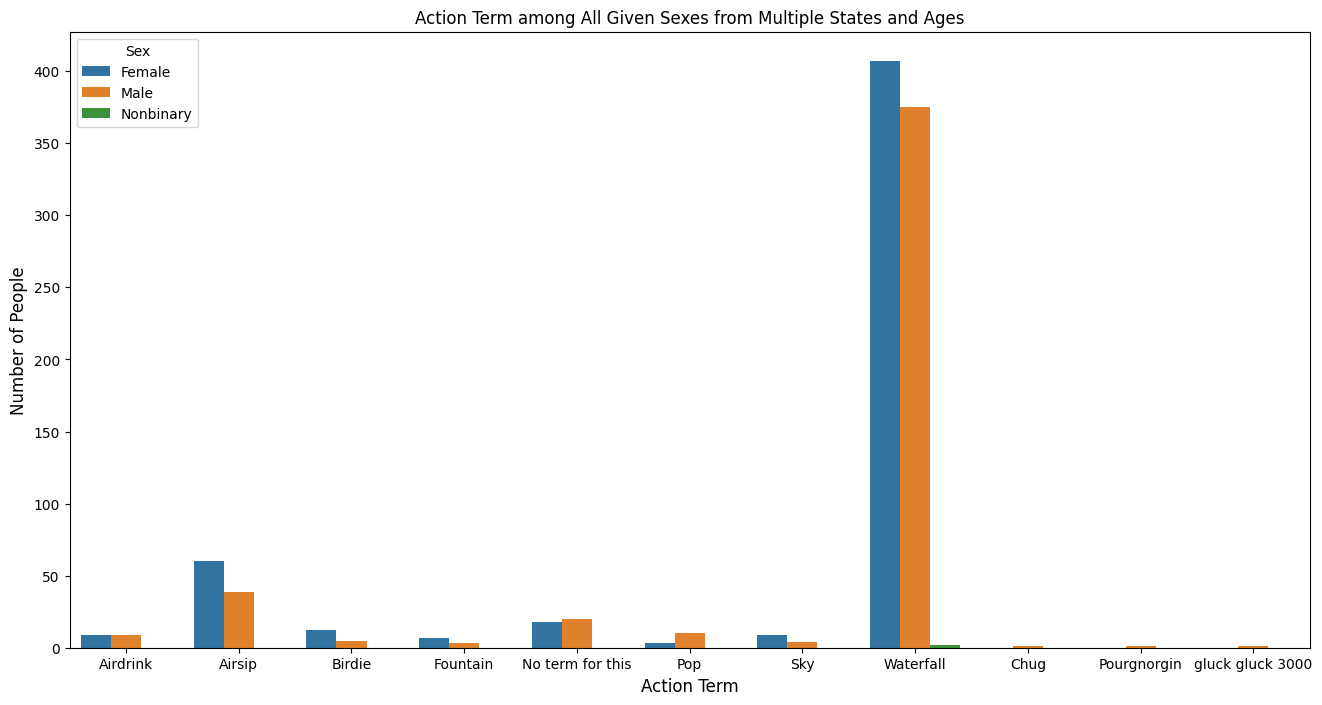

In [97]:
# Making the barplot and formating the graph so it is readable
plt.figure(figsize=(16,8))
sns.barplot(data=gen_act, x="Action", y="Counts", hue="Sex")
plt.title("Action Term among All Given Sexes from Multiple States and Ages", fontsize = 12)
plt.xlabel("Action Term", fontsize = 12)
plt.ylabel("Number of People", fontsize = 12)

For this attribute (Sex), we decided to use a Bar Plot instead of a Violin plot for a couple reasons. First, we have 3 different Sexes given to us, Female, Male, and Nonbinary. Due to this, the representation of data that would best fit would be a Bar Plot. We can see that the term "Waterfall" is the most popular among Males and Females. From this plot, we can see that for "Airsip", "Waterfall", "Birdie", "Fountain", and "Sky", Females had the highest count. We can also see that for "No term for this", "Pop", "Chug", "Pourgnorgin", and "gluck gluck 3000", Males had the highest count. For "Airdrink", there is a tie for Males and Females. The Nonbinary sex had two entries, both under "Waterfall". 

#### Action vs. Age

Now, let's compare the Action Term against Age. The first thing we need to do is calculate the ages of the respondants because we do not have a column for that yet. We can make this by using their Birthdays which we required them to input. We wanted to create a new dataframe to look at the age distribution before comparing it against the Action Term. Below, we made this dataframe and transposed it to have the ages as the columns.


In [102]:
## Calculating the Age from Birthdays and adding it to a new column in df
today = datetime.today()
data['Age'] = data['Birthday'].apply(lambda x: today.year - x.year - ((today.month, today.day) < (x.month, x.day)))


ages = data.groupby(['Age']).size().reset_index(name='Count')
# ^ This will get the number of times each Age occurs in our data
ages = ages.transpose() 
pd.set_option('display.max_columns', None)
ages.columns = ages.iloc[0]
ages = ages[1:]
ages

Age,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,51,53,63,67
Count,1,2,15,16,72,91,119,121,78,81,75,54,12,12,12,11,20,18,11,10,13,13,9,7,16,15,7,13,6,10,5,17,14,15,1,1,1,1,1


<Figure size 1600x800 with 0 Axes>

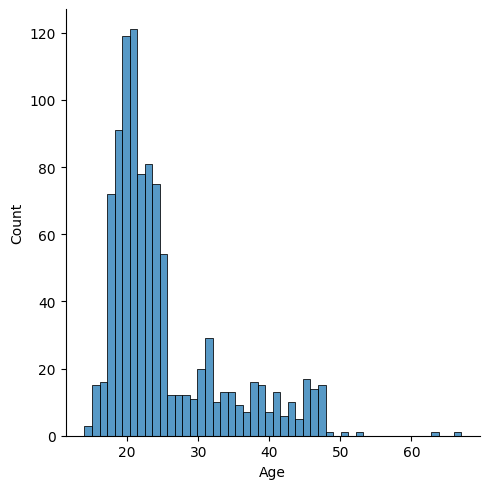

In [103]:
plt.figure(figsize=(16,8))
sns.displot(data, x="Age", bins = 50)

Just taking a look at our data, we see that most of the respondants are in aged 18-25 years old. We should keep this in mind when we are looking at the violin plots for each term. We are expecting to see unimodal or bimodal violins with the highest expectancies for each term around the ages of 18-25. 


Text(0, 0.5, 'Age (in Years)')

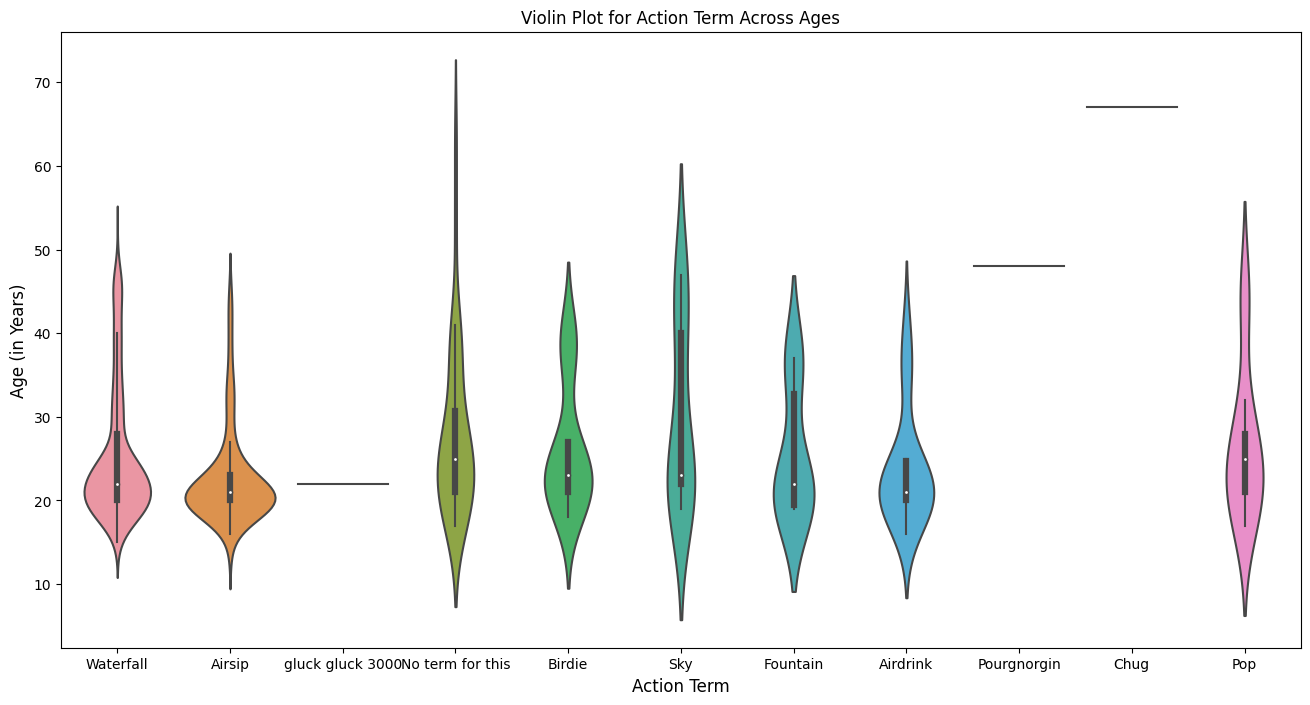

In [107]:
# Plotting to compare terms and highest expectacny for ages
plt.figure(figsize=(16,8))
sns.violinplot(data=data, x="Action", y="Age")
plt.title("Violin Plot for Action Term Across Ages", fontsize = 12)
plt.xlabel("Action Term", fontsize = 12)
plt.ylabel("Age (in Years)", fontsize = 12)

From this violin plot, we can see that the term "Waterfall" is unimodal, used mostly among people around the age of 20, which is where the media lies. "Waterfall" is also somewhat used evenly across ages 30-48 years old. The term "Airsip" is also unimodal, used very heavily for people around the age of 20. The "Airsip" distribution across ages is not a lot. We see that the term "gluck gluck 3000" is on the x-axis but there is no violin plot for it. This is because only one person responded with that. For the response "No term for this," we can see that the ages range all the way up to 70 years-old. It looks unimodal, between 20-30 years-old, but it is not as prominent as "Waterfall" or "Airsip". The median for this term lies around 25 years-old. The term "Birdie" is bimodal, but the higher probability is around the ages 20-30 years-old. The second highest is around 40 years-old. The term "Sky" is also biomodal. 

#### Correlation Matrix